# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data['ceiling_height'].value_counts()


2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [5]:
data['floor'].value_counts()


2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

In [6]:
data['total_area'].value_counts()


45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [7]:
data['rooms'].value_counts()


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [8]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

NameError: name 'plt' is not defined

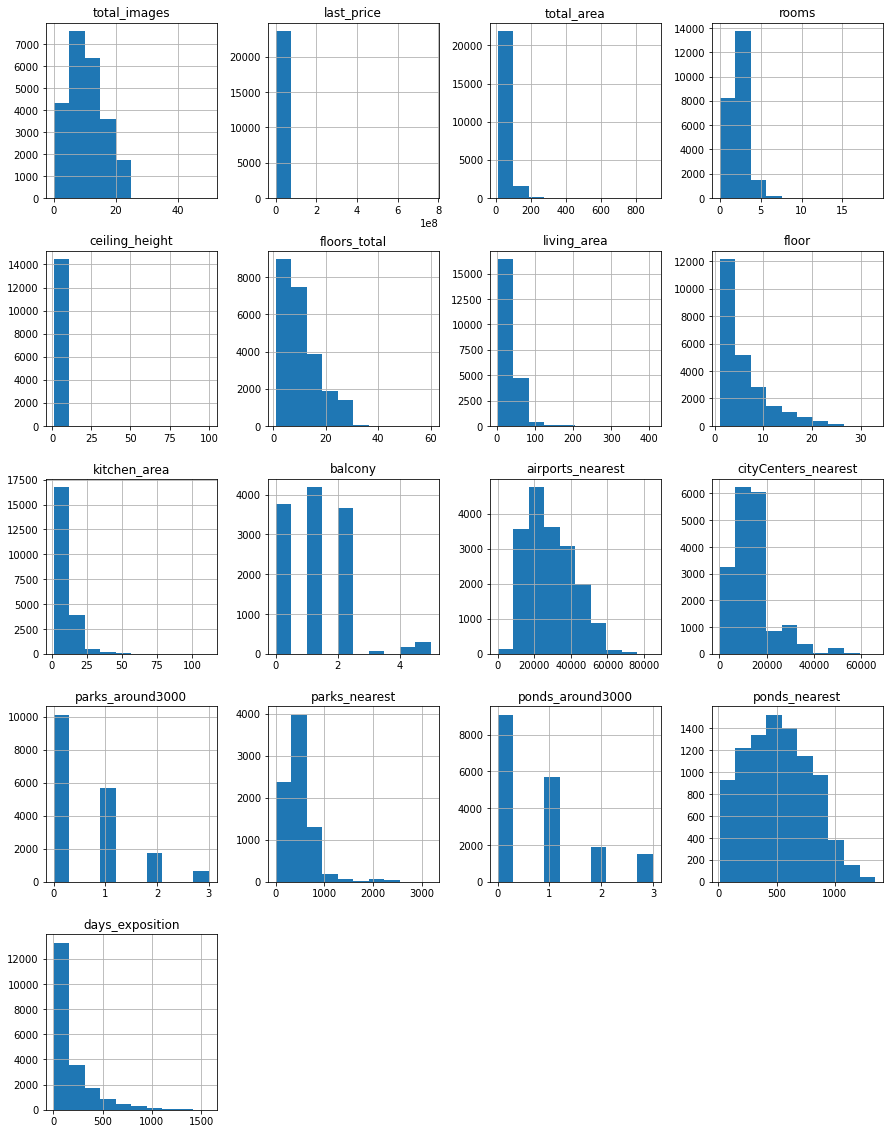

In [9]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [ ]:
data.isna().sum()#проверяем количество пропусков в данных

**Вывод**
В данных очень много пропущенных значений. 

В столбце, где указана высота потолков, почти половина значений отсутствует. Мы можем заменить пропуски группируя данные по количеству этажей в доме и получить медиану относительно полученных групп. Но вероятнее всего это не корректная информация которая может повлиять на исход исследования.

В столбце, где указаны апартаменты, заменим пропуски по аналогии с балконами. Вместо пропусков поставим значение False.

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest оставим без изменений, потому что воостановить эти данные слишком сложно.



In [ ]:
#переведем столбец с датой в формат даты без времени, потому что во всех значениях время указано 00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#Заменим пропущенные значения в столбце balcony на 0, скорее всего пропуски это отсутствие балкона в квартире
#Так же переведем столбец в тип данных int
data['balcony'] = data['balcony'].fillna(0).astype('int')

#Заменим пропуски в столбце ceiling_height на медианные значение по всем высотам сгруппированным по количеству этажей в доме.
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

#Остался 1 пропуск заменим его на медианное значение по всем высотам потолков
data_ceil_heigh = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data_ceil_heigh)

#Так же переведем столбец в тип данных float, и импортировав библиотеку numpy уберем из столбца основные аномальные значения где 
# высота потолков >= 20м
data['ceiling_height'].astype('float')
data['ceiling_height'] = np.where(data['ceiling_height'] >= 20, data['ceiling_height'] / 10, data['ceiling_height'] * 1)

data['ceiling_height'].unique()

In [ ]:
#В столбце, где указаны апартаменты, заменим пропуски по аналогии с балконами. Вместо пропусков поставим значение False.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
#заполним пропуски в столбце living area
#средняя общая площадь
total_area_avg = data['total_area'].mean()
#средняя жилая площадь
living_area_avg = data['living_area'].mean()
#в среднем жилая площадь составляет 57% от общей площади квартиры.
living_area_ratio = living_area_avg/total_area_avg
#заполняем пропущеные значения по полученым данным
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * 0.57
#заменим пропуски в столбце kitchen area
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[data['rooms'] == room, 'kitchen_area'].median()

оставшиеся пропуски в столбце площадь кухни это те значения где 0 комнат, вероятнее всего их можно не учитывать, по причине того что непонятно в чем ошибка и почему 0 комнат. Можно предположить что 0 комнат это студия где комната и кухня объеденены в 1 комнату. Тогда площадь кухни будет совпадать с жилой площадью квартиры.

In [ ]:
#заменим неявные дубликаты в названиях населённых пунктов

data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'ПГТ')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'ПГТ')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'село')
#data['locality_name'].value_counts()
#data['locality_name'].unique()

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#создадим столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#созддим столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#созддадим столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year


#создадим функцию которая отсортирует данные по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
#при помощи  apply() категоризуем этажи с помощью функции     
data['floor_category'] = data.apply(floor_category, axis = 1)

#добавим столбец соотношения жилой площади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']   

#добавим столбец расстояния от жилого помещения до центра города в км
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_in_km'] = np.round(data['cityCenters_nearest_in_km'], decimals = 0)

data.head(20)

### Проведите исследовательский анализ данных

In [ ]:
#построим гистограмму по стролбцу с общей площадью
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
#распределение данных в норме, есть выбросы, но они не сильно влияют на данные. 
#с помошью describe получим общие сведения.  

In [ ]:
#построим гистограмму по стролбцу с ценой
#data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 25, grid=True, range = (0, 15000000), figsize = (5,3))
data['last_price'].describe()
#с помошью describe получим общие сведения.
#в целом все хорошо, но значения выводятся в экспоненциальной записи чисел.


In [ ]:
#построим гистограмму по стролбцу с количеством комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()
#с помошью describe получим общие сведения.
#с данными все впорядке

In [ ]:
#построим гистограмму по стролбцу с высотами потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
#с данными все впорядке
#с помошью describe получим общие сведения.

In [ ]:
#построим гистограмму по стролбцу с жилой площадью
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,450))
data['living_area'].describe()
#распределение данных в норме, есть выбросы, но они не сильно влияют на данные. 
#с помошью describe получим общие сведения.  

In [ ]:
#построим гистограмму по стролбцу с общей площадью
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['kitchen_area'].describe()
#распределение данных в норме, есть выбросы, но они не сильно влияют на данные. 
#с помошью describe получим общие сведения.  

**Вывод**

- Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2.

- Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.

- Количество комнат колеблется от 1 до 19. В данных больше всего однокомнатных квартир. 

- Высота потолков в среднем составляет 2,77 м, а медиана 2,65 м.

- Жилая площадь в данных колеблется от 2(что считается выбросом и не особо влияет на данные) до 409 м2, среднее значение 22, а медиана 34 м2

- Площадь кухонь в данных начинается с 1 кв.м.(что считается выбросом и не особо влияет на данные) до 112 м2, среднее значение 5, а медиана 10 м2

- Во всех данных есть выбросы, например 0 комнат или высоты потолков в 1 и 100 метров, а также цена квартиры в 12190 рублей.
О таких данных можно спросить у тех кто предоставил нам данные.
Для общего изучения данных, не будем обрабатыватьэти аномальные значения.

- Обработка столбцов с расстояниями обрабатывать не имеет смысла, потому как там слишком много пропосков, что сильно исказит результат, а восстановить эти значения слишком сложно.



**задание**: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

In [ ]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

**Вывод** Cудя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. самая быстрая продажа исходя из данных это продажа за 1 день, а самая долгая это 1580 дней (4 с лишним года). Быстрой продажей можно назвать продажу за 7 дней, а долгой за 90 дней.

**задание**: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;*
  - жилой площади;*
  - площади кухни;*
  - количество комнат;*
  - типа этажа, на котором расположена квартира (первый, последний, другой);*
  - даты размещения (день недели, месяц, год);*

**Изучим зависимость цены от общей площади квартиры.**

In [ ]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

**Вывод** из графика мы видим, что зависимость есть и она положительная и ближе к 1 - согласно корреляции Пирсона в 0.65. Из этого следует, чем больше площадь тем выше стоимость квартиры.

**Изучим зависимость цены от жилой площади квартиры.**

In [ ]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

**Вывод** Из графика мы видим, что зависимость есть и она положительная и ближе к 1 - согласно корреляции Пирсона в 0.58. Из этого следует, чем больше площадь тем выше стоимость квартиры. Все так же как и в отношении общей площади и цены, но зависимость уже меньше... 

**Изучим зависимость цены от площади кухни.**

In [ ]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

**Вывод** Из графика мы видим, что зависимость есть и она осталась положительной, но все ближе к 0 - согласно корреляции Пирсона в 0.45. Из этого следует, чем больше площадь тем выше стоимость квартиры. Все так же как и в отношении жилой площади и цены, но зависимость еще меньше... 

**Изучим зависимость цены от количества комнат.**

In [ ]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

**Вывод** Из графика мы видим прямую зависимость стоимости квартиры от количества комнат. От 1 и до 4 комнат наблюдается плавный подъем, более 4 комнат уже идет явное повышение цены на квартиру. Коэффициент корреляции Пирсона положительный, 0.36.

**Изучим зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)**

In [ ]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

**Вывод** Из графика видно что дешевле всего квартиры на первом этаже, 2 группа стоимости это квартиры на последнем этаже. самые дорогие квартиры это не первый и не последний этаж(в категории другой).

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются меньшим спросом. 
</div 

**Изучим зависимость цены от даты размещения (день недели, месяц, год)**

**ДЕНЬ НЕДЕЛИ**

In [ ]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод** Из графика видно что с понедельника на вторник цены повышаются и во вторник находятся на пике а к концу недели цена значительно снижается и в воскресенье она самая низкая. 

**МЕСЯЦ**

In [ ]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**Вывод** Самая высокая стоимость квартир в апреле, сентябре и с ноября по декабрь. Самая низкая стоимость в июне. На рынке недвижимости,  присутствует эффекто сезонности и данный случай это не исключение. В начале лета мы видим наименьшую стоимость на квартиры. Вероятнее всего продавцы уехали отдыхать...эх!=(

**ГОД**

In [ ]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод** Из графика мы видим, что с 2014 до 2016 года цена на квартиры сильно падала, с 2016 по 2018 годы на рынке был застой и цена находилать примерно на одном уровне. И уже после 2018 рынок начал немного восстанавливаться и цена начала потихоньку повышаться.

**задание**: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [ ]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]
locality_pivot_table

**Вывод** Cамая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге - 114849 за 1 кв.м. тогда как самая низкая стоимость в Выборге - 58141 за 1 кв.м.

**задание**: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [ ]:
#отбросим значения с пропусками чтобы их не учитывать 
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].fillna(999999)
#
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in_km !=999999').pivot_table(index = 'cityCenters_nearest_in_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

**Вывод** В центре города самые дорогие квартиры - 245833 за кв.м. чем дальше от центра тем меньше стоимость за 1 кв.м. Судя по графику центром города можно назвать квартиры в радиусе 3 км. (наблюдается резкое падение стоимости). после 3 км начинается уже более плавный спад, есть скачки на 4-7 км и 27 км. Можно предположить что там находится что-то интересное или какая-то достопремичательностью либо это просто выброс.  

### Общий вывод

Мы обработали данные, обработали пропущенные значения там, где это необходимо. Посчитали и добавили в таблицу цену квадратного метра жилья, создали столбцы с датой днем недели, месяцем и годом размещения объявления, добавили категории по этажам квартир. Изучили площадь, цену, число комнат, высоту потолков на наличие выбивающихся значений. Были определены аномалии в данных параметрах и где это возможно обработали эти аномалии. Выяснили что быстрые продажи квартиры проходят в среднем за неделю, а долгой продажей можно считать 90 дней(возможно это максимальный срок действия объявления). Мы выявили, что на стоимость квартиры больше всего влияют квадратура, количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость  влияют день, месяц, год размещения и общая площадь. Выяснили, что с 2014 до 2016 года цена на квартиры сильно падала, с 2016 по 2018 годы на рынке был застой и цена находилать примерно на одном уровне. И уже после 2018 рынок начал немного восстанавливаться и цена начала потихоньку повышаться. А так же изучили зависимость стоимости квадратного метра квартиры в зависимости от растояния до центра.